TASK 1: DATA PREPARATION

In [ ]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Telco_Customer_Churn_Dataset  (3) (1).csv to Telco_Customer_Churn_Dataset  (3) (1).csv


In [59]:
#LOAD DATA
data=pd.read_csv('Telco_Customer_Churn_Dataset  (3) (1).csv')

In [60]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
#TOP 5 VALUES
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#BOTTOM 5 VALUES
data .tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [61]:
#CHECK NULL VALUES
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [62]:
data.isnull().sum().sum()

0

In [63]:
# DROP IRRELEVANT CATEGORY
data.drop(columns=['customerID'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [64]:
#CONVERT CATEGORICAL VARIABLE INTO NUMERIC VARIABLE
df=['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn']
data[df].apply(lambda x:x.map({'Yes':1,'No':0,'Female':0,'Male':1}))

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


In [65]:
# SPLIT THE MODEL
x=data.drop(columns=['Churn'])
y=data['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 20)
(1409, 20)
(5634,)
(1409,)


TASK 2 :EXPLORATORY DATA ANALYSIS (EDA)

In [72]:
#CALCULATE CHURN RATE
# CHURN RATE = NUMBER OF CHURNED CUSTOMER (LEFT THE SERVICES)/TOTAL NUMBER OF CUSTOMERS*100
churn_rate=data['Churn'].value_counts(normalize=True)
print(churn_rate)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


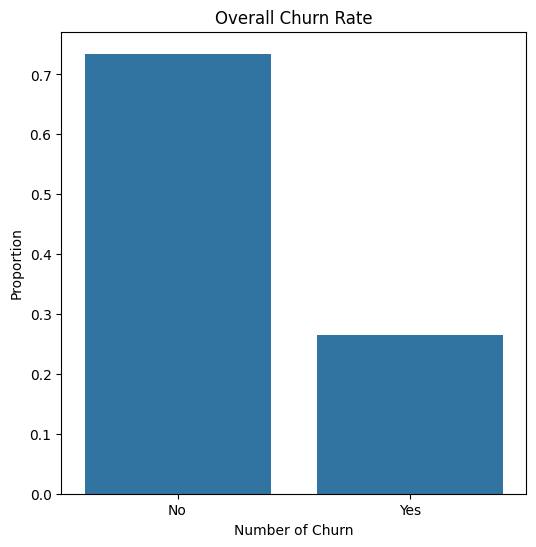

In [73]:
#visualize churn rate
plt.figure(figsize=(6,6))
sns.barplot(x=churn_rate.index,y=churn_rate.values)
plt.xlabel('Number of Churn')
plt.ylabel('Proportion')
plt.title('Overall Churn Rate')
plt.show()

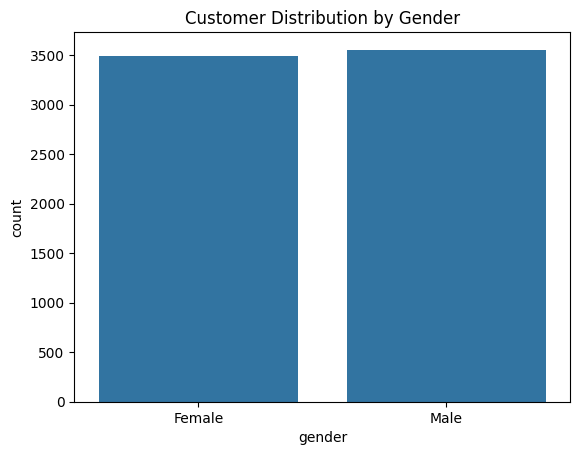

In [74]:
# VISUALIZE CUSTOMER DISTRIBUTION WITH GENDER
sns.countplot(x='gender',data=data)
plt.title('Customer Distribution by Gender')
plt.show()

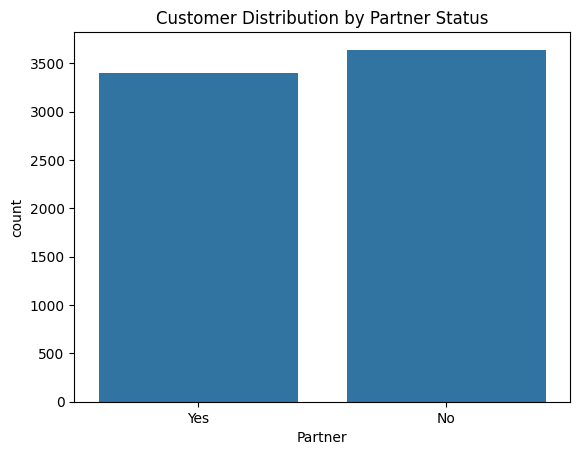

In [75]:
#VISUALIZE CUSTOMER DISTRIBUTION WITH PARTNER STATUS
sns.countplot(x='Partner',data= data )
plt.title('Customer Distribution by Partner Status')
plt.show()

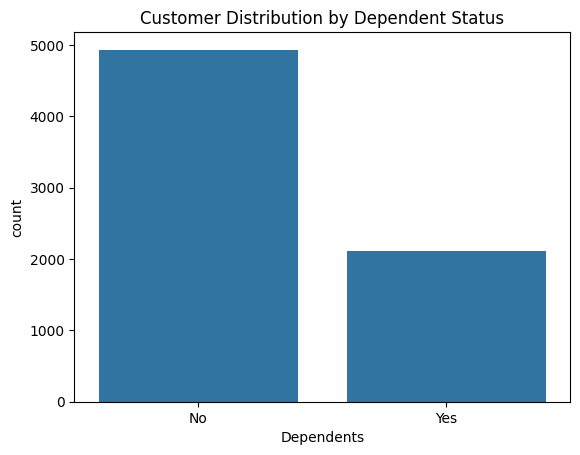

In [76]:
#VISUALIZE CUSTOMER DISTRIBUTION WITH DEPENDENT STATUS
sns.countplot(x='Dependents',data=data)
plt.title('Customer Distribution by Dependent Status')
plt.show()

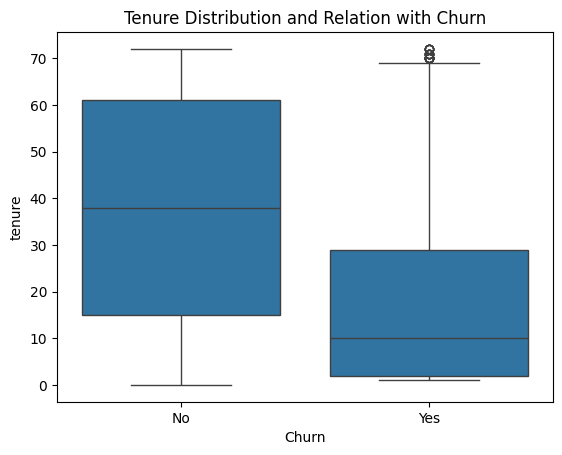

In [77]:
#TENURE DISTRIBUTION AND ITS RELATION WITH CHURN
sns.boxplot(x='Churn',y='tenure',data=data)
plt.title('Tenure Distribution and Relation with Churn')
plt.show()

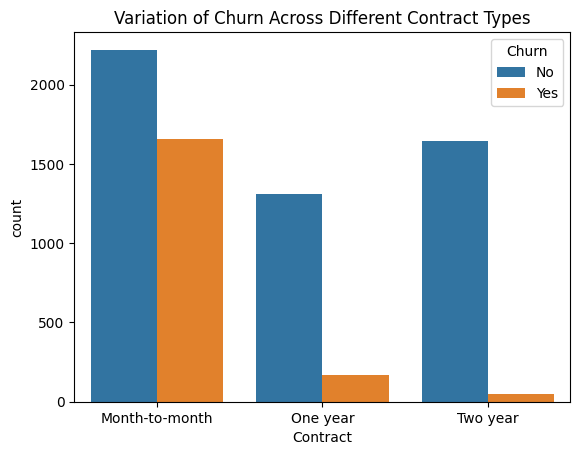

In [78]:
#VARIATION OF CHURN VARIES ACROSS DIFFERENT CONTRACT TYPES
sns.countplot(x='Contract',hue='Churn',data=data)
plt.title('Variation of Churn Across Different Contract Types')
plt.show()

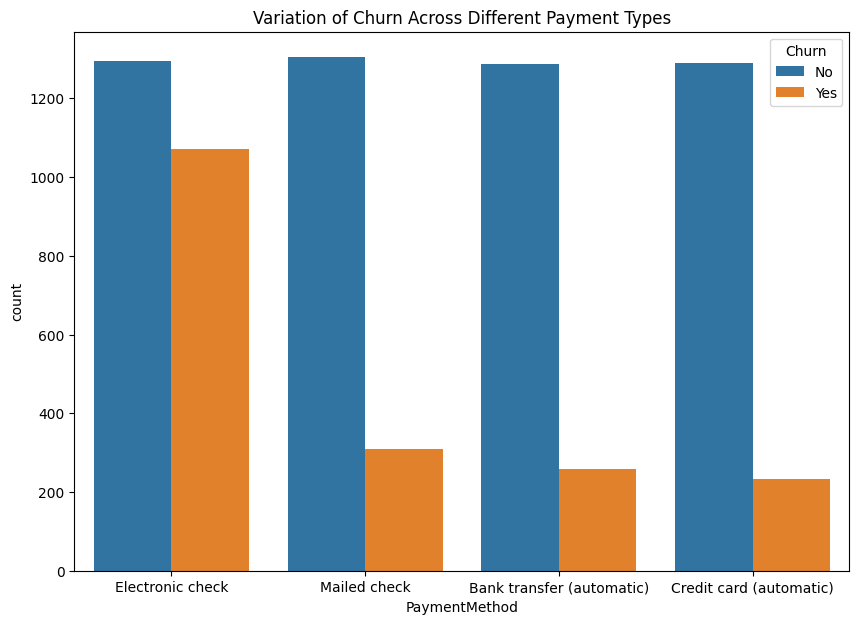

In [79]:
#VARIATION OF CHURN VARIES ACROSS DIFFERENT PAYMENT TYPES
plt.figure(figsize=(10,7))
sns.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.title('Variation of Churn Across Different Payment Types')
plt.show()

TASK 3 : CUSTOMER SEGMENTATION

In [86]:
data['Tenure_groups']=pd.cut(data['tenure'],bins=[0,12,48,float('inf')],labels=['short term','medium term','long term'])

In [87]:
print(data['Tenure_groups'])

0        short term
1       medium term
2        short term
3       medium term
4        short term
           ...     
7038    medium term
7039      long term
7040     short term
7041     short term
7042      long term
Name: Tenure_groups, Length: 7043, dtype: category
Categories (3, object): ['short term' < 'medium term' < 'long term']


In [88]:
data['monthly_charges_groups']=pd.cut(data['MonthlyCharges'],bins=[0,50,100,float('inf')],labels=['low','medium','high'])

In [89]:
print(data['monthly_charges_groups'])

0          low
1       medium
2       medium
3          low
4       medium
         ...  
7038    medium
7039      high
7040       low
7041    medium
7042      high
Name: monthly_charges_groups, Length: 7043, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']


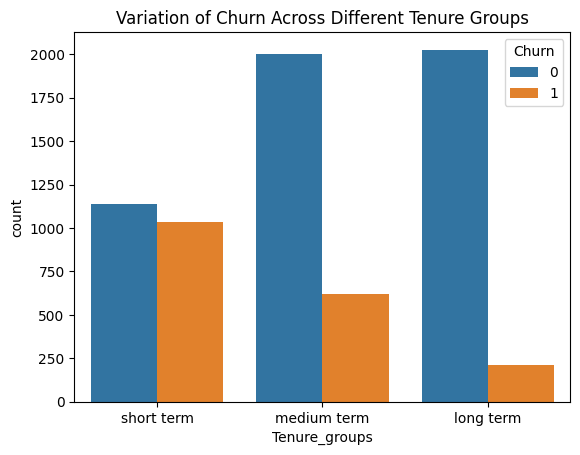

In [90]:
#VARIATION OF CHURN ACROSS DIFFERENT TENURE GROUPS
sns.countplot(x='Tenure_groups',hue='Churn',data=data)
plt.title('Variation of Churn Across Different Tenure Groups')
plt.show()

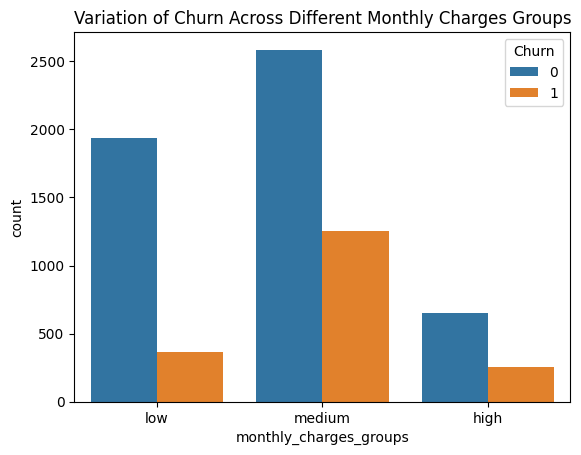

In [91]:
#VARIATION OF CHURN ACCROSS DIFFERENT MONTHLY CHARGES GROUPS
sns.countplot(x='monthly_charges_groups',hue='Churn',data=data)
plt.title('Variation of Churn Across Different Monthly Charges Groups')
plt.show()

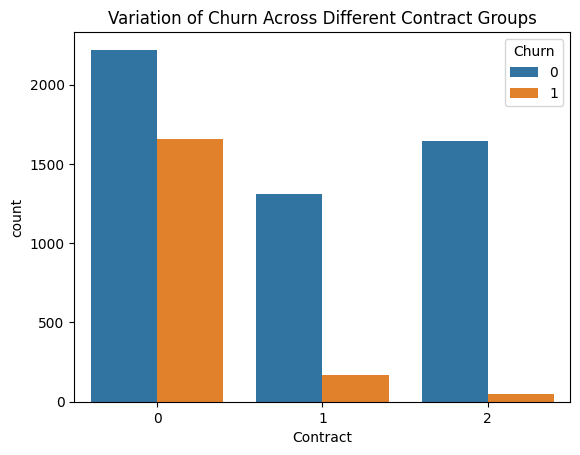

In [129]:
#VARIATION OF CHURN ACROSS DIFFERENT CONTRACT GROUPS
sns.countplot(x='Contract',hue='Churn',data=data)
plt.title('Variation of Churn Across Different Contract Groups')
plt.show()

In [93]:
High_Risk=data[(data['Tenure_groups']=='Long term') & (data['monthly_charges_groups']=='High') & (data['Churn']=='Yes')]


In [94]:
print('High value customers at risk of churn:')
print(High_Risk[['customerID','Contract','PaymentMethod','MonthlyCharges','tenure']])

High value customers at risk of churn:
Empty DataFrame
Columns: [customerID, Contract, PaymentMethod, MonthlyCharges, tenure]
Index: []


TASK 4 : CHURN PREDICTION MODEL

In [118]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [98]:
#CONVERT CATEGORICAL VARIABLE INTO NUMERIC VARIABLE
categorical_cols =data.select_dtypes(include=['object']).columns
label_encoders={}
for col in categorical_cols:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
  label_encoders[col]=le



In [106]:
for colm in ['Tenure_groups','monthly_charges_groups']:
  le=LabelEncoder()
  data[colm]=le.fit_transform(data[colm])
  label_encoders[colm]=le

In [107]:
#CHECK THE DATA TYPE
print(data.dtypes)

customerID                  int64
gender                      int64
SeniorCitizen               int64
Partner                     int64
Dependents                  int64
tenure                      int64
PhoneService                int64
MultipleLines               int64
InternetService             int64
OnlineSecurity              int64
OnlineBackup                int64
DeviceProtection            int64
TechSupport                 int64
StreamingTV                 int64
StreamingMovies             int64
Contract                    int64
PaperlessBilling            int64
PaymentMethod               int64
MonthlyCharges            float64
TotalCharges                int64
Churn                       int64
Tenure_groups               int64
monthly_charges_groups      int64
dtype: object


In [108]:
X=data.drop(columns=['Churn'])
y=data['Churn']

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [110]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [112]:
#LOGISTIC REGRESSION
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [120]:
y_pred=model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [122]:
accuracy =accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy ",accuracy)
print("precision ",precision)
print("recall ",recall)
print("f1 ",f1)

accuracy  0.36905606813342795
precision  0.27835051546391754
recall  0.868632707774799
f1  0.4216005204944697


In [123]:
# DECISION TREE
model=DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [124]:
y_pred=model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [125]:
accuracy =accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy ",accuracy)
print("precision ",precision)
print("recall ",recall)
print("f1 ",f1)

accuracy  0.6557842441447835
precision  0.4292929292929293
recall  0.9115281501340483
f1  0.5836909871244635


In [126]:
# RANDOM FOREST
model=RandomForestClassifier()
model.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [127]:
y_pred=model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [128]:
accuracy =accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy ",accuracy)
print("precision ",precision)
print("recall ",recall)
print("f1 ",f1)

accuracy  0.7352732434350603
precision  0.0
recall  0.0
f1  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
